<center><h1>Handling Imbalanced Dataset</h1></center>

This usually occurs in fraud detection prediction where 99000 transactions are not fraud but 1000 transactions are fraud. This huge imbalance can affect prediction.

 To handle this, k nearest neighbour algorithm can be used to generate synthetic examples. SMOTE (**S**ynthetic **M**inority **O**ver-sampling **TE**chnique) is used for this
 
Another method is Ensemble Method - this divide the huge data sample or points to chunks and train each chunk against the 1000 fraud datapoints. afterward, average of each accuracy is taken.

Focal Loss - this method will penalize majority samples during loss calculaton and give more weight to minority class samples.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [115]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
# Loading dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# remove space in columns
df.columns = df.columns.str.strip()

In [5]:
df[:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Drop customer id column
df.drop('customerID', axis = 1, inplace = True)

In [8]:
df[:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
# Checking values in TotalCharges column that has space
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Dropping the rows with empty values in TotalCharges column
df1 = df[df['TotalCharges'] != ' ']

In [11]:
# Confirming the empty values in TotalCharges column has been dropped
df1[pd.to_numeric(df1.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [13]:
df1['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


In [14]:
 # tenure of customers that are not leaving
tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_no 

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [15]:
 # tenure of customers that are not leaving
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure
tenure_churn_yes 

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

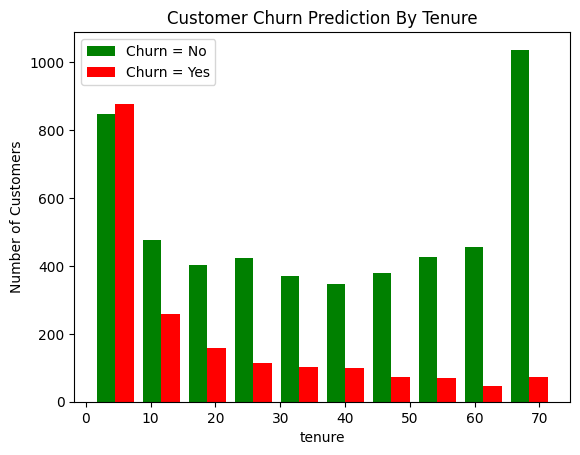

In [16]:
# Plotting the histogram of the tenure churns
plt.hist([tenure_churn_no, tenure_churn_yes], color = ['g', 'r'], label = ['Churn = No', 'Churn = Yes'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction By Tenure')
plt.legend();

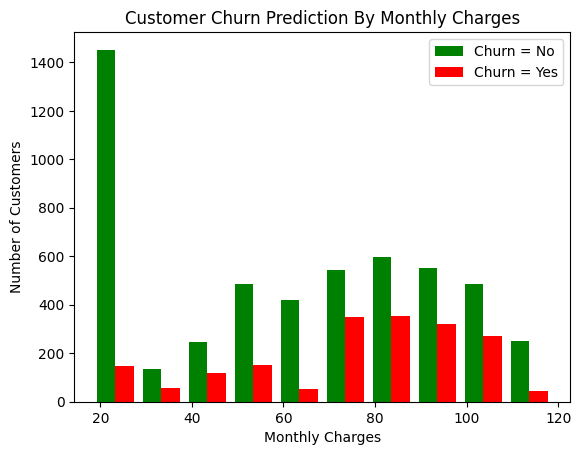

In [17]:
 # Monthly charges of customers that are not leaving
mc_churn_no = df1[df1['Churn'] == 'No'].MonthlyCharges

 # tenure of customers that are not leaving
mc_churn_yes = df1[df1['Churn'] == 'Yes'].MonthlyCharges

# Plotting the histogram of the tenure churns
plt.hist([mc_churn_no, mc_churn_yes], color = ['g', 'r'], label = ['Churn = No', 'Churn = Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction By Monthly Charges')
plt.legend();

In [18]:
# To know the unique values in each column
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [19]:
# Columns with object datatypes
def print_object_col_unique_val(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [20]:
object_col = print_object_col_unique_val(df1)
object_col

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn : ['No' 'Yes']


In [24]:
# Replacing 'no internet service' with 'no'
df1 = df1.replace('No internet service', 'No')

/tmp/ipykernel_30/3179067336.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace('No internet service', 'No')


In [25]:
df2 = df1.copy()

In [26]:
object_col2 = print_object_col_unique_val(df2)
object_col2

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [27]:
# Replacing 'no phone service' with 'no'
df2 = df2.replace('No phone service', 'No')

In [28]:
object_col3 = print_object_col_unique_val(df2)
object_col3

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
# return columns with yes or no values
def get_yes_no_columns(df):
    return [col for col in df if df[col].dtype == 'object' and set(df[col].unique()) <= {'Yes', 'No'}]

In [30]:
yes_no_cols = get_yes_no_columns(df2)
yes_no_cols

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [31]:
# replacing yes or no with 1, 0 in the columns with yes or no values
for col in yes_no_cols:
    df2[col] = df2[col].map({'Yes': 1, 'No': 0}).astype(int)

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [33]:
df2['gender'] = df2['gender'].map({'Female': 1, 'Male': 0}).astype(int)

In [34]:
object_col4 = print_object_col_unique_val(df2)
object_col4

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [35]:
# Dummy conversion for the categorical columns
df2 = pd.get_dummies(data = df2, columns = object_col4).astype(int)
df2[:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [36]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
#Defining X and y
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [42]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = ks.Sequential([
        ks.Input(shape=(26,)),  # Input layer
        ks.layers.Dense(20, activation='relu'),  # Hidden layer
        ks.layers.Dense(15, activation='relu'),  # Hidden layer
        ks.layers.Dense(10, activation='relu'),  # Hidden layer
        ks.layers.Dense(1, activation='sigmoid')  # Output layer
        
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
        
    print('Classification Report: \n', classification_report(y_test, y_preds))
    
    return y_preds

In [43]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5527 - loss: 0.6713
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.4523
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8005 - loss: 0.4290
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4229
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4217
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.4127
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.4186
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8155 - loss: 0.3889
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4090
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.3855
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.4027
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [45]:
# class count
count_class_0, count_class_1 = df1['Churn'].value_counts()
count_class_0, count_class_1

(5163, 1869)

In [46]:
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [47]:
df_class_0.shape 

(5163, 27)

In [48]:
df_class_1.shape

(1869, 27)

# First Method - Under sampling

### Taking Samples from df_class_0

In [49]:
df_class_0_under = df_class_0.sample(count_class_1)

# combining the sampled class and the other class
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [50]:
df_test_under.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [52]:
X = df_test_under.drop('Churn', axis = 1)
y= df_test_under['Churn']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)  # the stratify argument will ensure balanced samples

In [54]:
y_train.value_counts()

Churn
1    1495
0    1495
Name: count, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5309 - loss: 0.6854
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7419 - loss: 0.5485
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7650 - loss: 0.4968
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.4815
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7461 - loss: 0.5021
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7653 - loss: 0.4863
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7800 - loss: 0.4741
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7683 - loss: 0.4793
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7749 - loss: 0.4768
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7778 - loss: 0.4734
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7783 - loss: 0.4768
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

# Second Method - Oversampling

In [56]:
count_class_0, count_class_1

(5163, 1869)

In [67]:
# duplicating the original rows to oversample
df_class_1_over = df_class_1.sample(count_class_0, replace=True)  # this will duplicate some rows in the dataset to complete the sample number

In [69]:
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)
df_test_over.shape

(10326, 27)

In [70]:
df_test_over['Churn'].value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

In [71]:
X = df_test_over.drop('Churn', axis = 1)
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)  # the stratify argument will ensure balanced samples

In [72]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [73]:
 y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6801 - loss: 0.5940
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7609 - loss: 0.4909
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7627 - loss: 0.4849
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7642 - loss: 0.4782
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7723 - loss: 0.4699
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.4734
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7726 - loss: 0.4705
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7665 - loss: 0.4778
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7694 - loss: 0.4726
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.4558
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7769 - loss: 0.4640
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

# Method 3 - SMOTE

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [76]:
X = df_test_over.drop('Churn', axis = 1)
y = df_test_over['Churn']

In [78]:
X_sm, y_sm = smote.fit_resample(X, y)

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.2, random_state=0, stratify = y_sm)  # the stratify argument will ensure balanced samples

In [80]:
 y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6991 - loss: 0.5960
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.4971
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7689 - loss: 0.4874
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.4856
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7665 - loss: 0.4799
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7731 - loss: 0.4766
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7785 - loss: 0.4706
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7738 - loss: 0.4693
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.4709
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7804 - loss: 0.4652
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.4677
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

# Method 4: Ensemble Method

In [85]:
df2['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [86]:
X = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify = y)  # the stratify argument will ensure balanced samples

In [88]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [89]:
4130 / 1495

2.762541806020067

In [90]:
4130/3

1376.6666666666667

In [94]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [95]:
df3_class_0 = df3[df3['Churn'] == 0]
df3_class_1 = df3[df3['Churn'] == 1]

In [96]:
df3_class_0.shape, df3_class_1.shape

((4130, 27), (1495, 27))

In [99]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop('Churn', axis=1)
    y_train = df_train['Churn']
    
    return X_train, y_train

In [100]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

In [101]:
X_train.shape

(2990, 26)

In [102]:
 y_preds1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5619 - loss: 0.6745
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7544 - loss: 0.5284
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.4770
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7749 - loss: 0.4853
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7700 - loss: 0.4859
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.4736
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7816 - loss: 0.4678
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7775 - loss: 0.4718
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.4604
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7831 - loss: 0.4633
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7843 - loss: 0.4543
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [104]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_preds2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6550 - loss: 0.6383
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7428 - loss: 0.5358
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7534 - loss: 0.5153
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7565 - loss: 0.5106
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7602 - loss: 0.4997
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7580 - loss: 0.5035
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7622 - loss: 0.4924
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7624 - loss: 0.4942
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7503 - loss: 0.5063
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7688 - loss: 0.4850
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.4943
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [105]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)

y_preds3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5618 - loss: 0.6827
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7159 - loss: 0.5927
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7642 - loss: 0.5133
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7537 - loss: 0.5008
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.4851
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7705 - loss: 0.4836
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - loss: 0.4774
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.4844
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7716 - loss: 0.4697
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7850 - loss: 0.4597
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4764
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [106]:
len(y_preds1)

1407

In [107]:
len(y_preds2)

1407

In [109]:
len(y_preds3)

1407

In [113]:
y_pred_final = y_preds1.copy()

for i in range(len(y_preds1)):
    n_ones = y_preds1[i] + y_preds2[i] + y_preds3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [117]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

